<a href="https://colab.research.google.com/github/shakasom/MapsDataScience/blob/master/Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making sense of humongous location datasets

## Installations

The geospatial libraries are not pre installed in google colab as standard python library, therefore we need to install some libraries to use. Luckily this is an easy process. You can use either apt install or pip install. You can also create anaconda environment, but that is a bit complex so pip and apt are enough in our case to get the libraries we need. These are the libraries we need to install in this tutorial:

Gdal Geopandas Folium

The installation might take 1 minute.

In [0]:
%%time 
!apt update
!apt upgrade
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium 
# Install Pysal
!pip install pysal
# Install splot --> pysal
!pip install splot


In [0]:
!pip install mapclassify # Move it up

In [0]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from pysal.explore import esda
from pysal.lib import weights
#import libysal as lps
from pysal.viz.splot.esda import plot_moran, plot_local_autocorrelation, lisa_cluster
import matplotlib
import matplotlib.pyplot as plt 
import folium
import os
import seaborn as sns
from sklearn.cluster import dbscan

In [0]:
import pysal as ps
ps.__version__

'2.0.0'

## Data 

The dataset for this chapter is stored in the dropbox link. It is a valuable skill to learn how to access data on the web, so we will use WGET. WGET is great utility in accessing files from the web and supports different protocols. 


In [0]:
# Get the data from dropbox link
!wget https://www.dropbox.com/s/xvs0ybc402mkrn8/2019-02-avon-and-somerset-street.zip

In [0]:
# see the folders available
import os
os.listdir(os.getcwd())

['.config', '2019-02-avon-and-somerset-street.zip', 'sample_data']

In [0]:
# We have zipped data so let us unzip it
!unzip 2019-02-avon-and-somerset-street.zip

Archive:  2019-02-avon-and-somerset-street.zip
  inflating: 2019-02-avon-and-somerset-street.csv  


In [0]:
crime_somerset = pd.read_csv("2019-02-avon-and-somerset-street.csv")
crime_somerset.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2019-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.515072,51.419357,On or near Stockwood Hill,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,NaN
1,NaN,2019-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.516919,51.423683,On or near A4175,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,NaN
2,NaN,2019-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.516919,51.423683,On or near A4175,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,NaN
3,NaN,2019-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509384,51.409590,On or near Barnard Walk,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,NaN
4,NaN,2019-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509126,51.416137,On or near St Francis Road,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,NaN


In [0]:
crime_somerset.shape

(13183, 12)

In [0]:
crime_somerset.isnull().sum()

Crime ID                  2608
Month                        0
Reported by                  0
Falls within                 0
Longitude                 1400
Latitude                  1400
Location                     0
LSOA code                 1400
LSOA name                 1400
Crime type                   0
Last outcome category     2608
Context                  13183
dtype: int64

In [0]:
crime_somerset.drop(['Last outcome category','Context', 'Crime ID' ], axis=1, inplace=True)

In [0]:
crime_somerset.head()

,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type
0,2019-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.515072,51.419357,On or near Stockwood Hill,E01014399,Bath and North East Somerset 001A,Anti-social behaviour
1,2019-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.516919,51.423683,On or near A4175,E01014399,Bath and North East Somerset 001A,Anti-social behaviour
2,2019-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.516919,51.423683,On or near A4175,E01014399,Bath and North East Somerset 001A,Anti-social behaviour
3,2019-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509384,51.409590,On or near Barnard Walk,E01014399,Bath and North East Somerset 001A,Anti-social behaviour
4,2019-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509126,51.416137,On or near St Francis Road,E01014399,Bath and North East Somerset 001A,Anti-social behaviour


In [0]:
crime_somerset.isnull().sum()

Month              0
Reported by        0
Falls within       0
Longitude       1400
Latitude        1400
Location           0
LSOA code       1400
LSOA name       1400
Crime type         0
dtype: int64

In [0]:
crime_somerset.dropna(axis=0,inplace=True)

In [0]:
crime_somerset.isnull().sum()

Month           0
Reported by     0
Falls within    0
Longitude       0
Latitude        0
Location        0
LSOA code       0
LSOA name       0
Crime type      0
dtype: int64

In [0]:
crime_somerset.shape


(11783, 9)

In [0]:
crime_somerset.head()

,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type
0,2019-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.515072,51.419357,On or near Stockwood Hill,E01014399,Bath and North East Somerset 001A,Anti-social behaviour
1,2019-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.516919,51.423683,On or near A4175,E01014399,Bath and North East Somerset 001A,Anti-social behaviour
2,2019-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.516919,51.423683,On or near A4175,E01014399,Bath and North East Somerset 001A,Anti-social behaviour
3,2019-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509384,51.409590,On or near Barnard Walk,E01014399,Bath and North East Somerset 001A,Anti-social behaviour
4,2019-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509126,51.416137,On or near St Francis Road,E01014399,Bath and North East Somerset 001A,Anti-social behaviour


### Convert to GeoDataFrame

In [0]:

def create_gdf(df, lat, lon):
    """ Convert pandas dataframe into a Geopandas GeoDataFrame"""
    crs = {'init': 'epsg:4326'}
    geometry = [Point(xy) for xy in zip(df[lon], df[lat])]
    gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
    return gdf

In [0]:
crime_somerset_gdf = create_gdf(crime_somerset, 'Latitude', 'Longitude')
crime_somerset_gdf.head()

,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,geometry
0,2019-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.515072,51.419357,On or near Stockwood Hill,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,POINT (-2.515072 51.419357)
1,2019-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.516919,51.423683,On or near A4175,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,POINT (-2.516919 51.423683)
2,2019-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.516919,51.423683,On or near A4175,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,POINT (-2.516919 51.423683)
3,2019-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509384,51.409590,On or near Barnard Walk,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,POINT (-2.509384 51.40959)
4,2019-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509126,51.416137,On or near St Francis Road,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,POINT (-2.509126 51.416137)


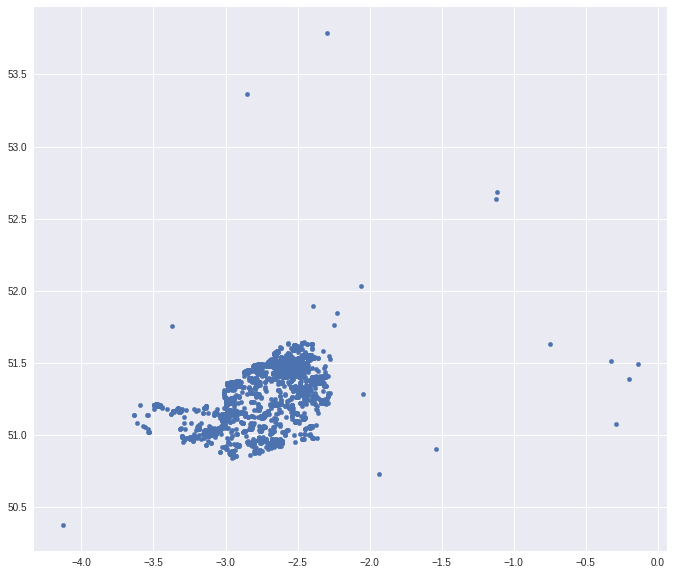

In [0]:
fig, ax = plt.subplots(figsize=(12,10))
crime_somerset_gdf.plot(markersize=20, ax=ax);
plt.savefig('crime_somerset_map.png', bbox_inches='tight')

## KMeans Clustering Location Data

In [0]:
from sklearn.cluster import KMeans

In [0]:
crime_somerset_gdf.head()

,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,geometry
0,2019-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.515072,51.419357,On or near Stockwood Hill,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,POINT (-2.515072 51.419357)
1,2019-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.516919,51.423683,On or near A4175,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,POINT (-2.516919 51.423683)
2,2019-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.516919,51.423683,On or near A4175,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,POINT (-2.516919 51.423683)
3,2019-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509384,51.409590,On or near Barnard Walk,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,POINT (-2.509384 51.40959)
4,2019-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509126,51.416137,On or near St Francis Road,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,POINT (-2.509126 51.416137)


In [0]:
train = crime_somerset_gdf.sample(frac=0.7, random_state=14)
test = crime_somerset_gdf.drop(train.index)
train.shape, test.shape

((8248, 10), (3535, 10))

In [0]:
train_coords = train[['Latitude', 'Longitude']].values
test_coords = test[['Latitude', 'Longitude']].values

In [0]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(train_coords)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [0]:
preds = kmeans.predict(test_coords)
centers = kmeans.cluster_centers_

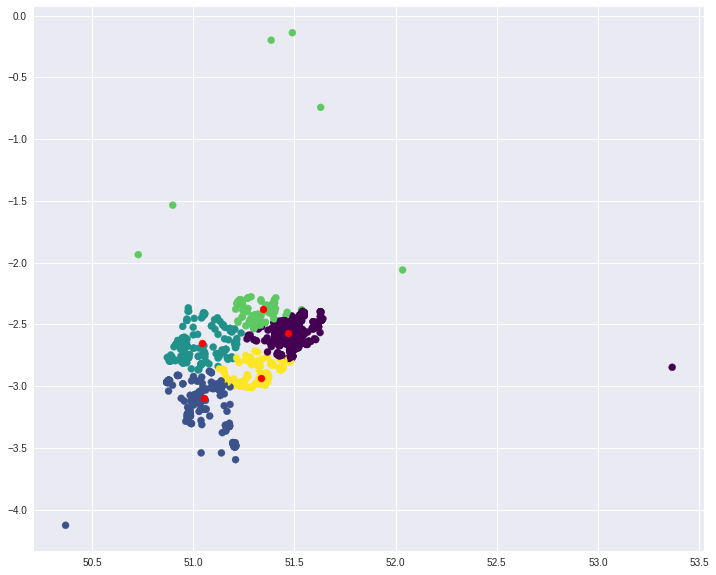

In [0]:
fig, ax = plt.subplots(figsize=(12,10))
plt.scatter(test_coords[:, 0], test_coords[:, 1], c=preds, s=50, cmap='viridis')
plt.scatter(centers[:,0], centers[:,1], c='Red');

## DBSCAN 

### Detecting Outliers/Noise

In [0]:
coords = crime_somerset_gdf[['Latitude', 'Longitude']]
coords[:5]

,Latitude,Longitude
0,51.419357,-2.515072
1,51.423683,-2.516919
2,51.423683,-2.516919
3,51.409590,-2.509384
4,51.416137,-2.509126


In [0]:
_, labels  = dbscan(crime_somerset_gdf[['Latitude', 'Longitude']], eps=0.1, min_samples=10)


In [0]:
labels_df = pd.DataFrame(labels, index=crime_somerset_gdf.index, columns=['cluster'])
labels_df.head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [0]:
labels_df.groupby('cluster').size()

cluster
-1       18
 0    11765
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


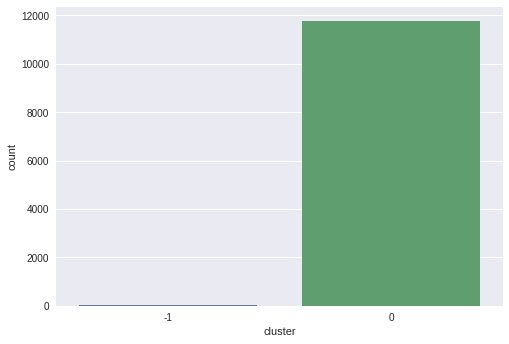

In [0]:
sns.countplot(labels_df.cluster);

In [0]:

noise = crime_somerset_gdf.loc[labels_df['cluster']==-1, ['Latitude', 'Longitude']]
core = crime_somerset_gdf.loc[labels_df['cluster']== 0, ['Latitude', 'Longitude']]

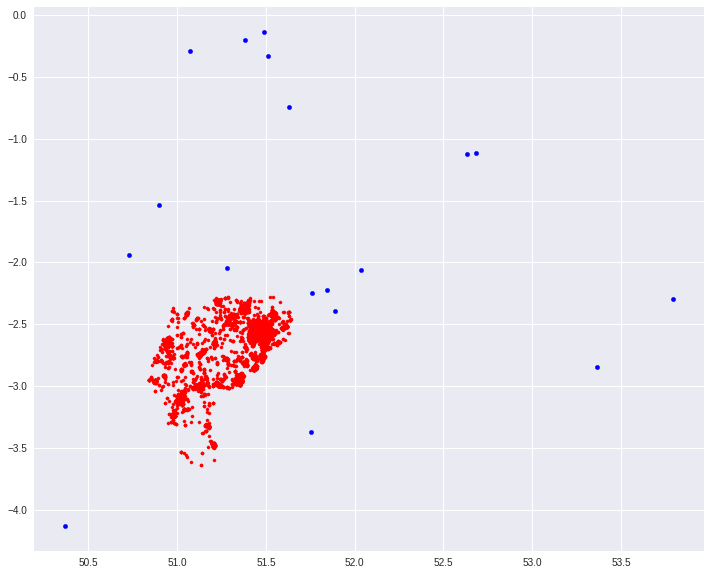

In [0]:


fig, ax = plt.subplots(figsize=(12,10))
ax.scatter(noise['Latitude'], noise['Longitude'],s=20, c='blue' )
ax.scatter(core['Latitude'], core['Longitude'], s=10, c='red')
plt.savefig('outliers.png');
plt.show();


In [0]:
noise

,Latitude,Longitude
5515,53.791463,-2.292410
5516,52.684583,-1.115782
5517,51.509993,-0.326819
5518,51.890164,-2.393020
5519,51.842758,-2.223547
5520,51.072400,-0.291105
5521,53.366498,-2.848328
5522,52.633265,-1.125106
6156,51.752409,-3.372417
6158,50.898266,-1.535575


In [0]:
def dbscan_model(gdf, eps, min_sample):
    _, labels  = dbscan(gdf[['Latitude', 'Longitude']], eps=eps, min_samples=min_sample)
    labels_df = pd.DataFrame(labels, index=crime_somerset_gdf.index, columns=['cluster'])
    labels_df.groupby('cluster').size()
    noise = gdf.loc[labels_df['cluster']==-1, ['Latitude', 'Longitude']]
    core = gdf.loc[labels_df['cluster']== 0, ['Latitude', 'Longitude']]
    n_other_clusters = labels_df['cluster'].nunique() - 2
    #print(n_other_clusters)
    other_groups = []
    for i in range(1, n_other_clusters):
        groups = 'group'+str(1)
        groups = gdf.loc[labels_df['cluster']== i, ['Latitude', 'Longitude']]
        
        groups.append(other_groups)
    fig, ax = plt.subplots(figsize=(12,10))
    ax.scatter(noise['Latitude'], noise['Longitude'],s=20, c='blue' )
    ax.scatter(core['Latitude'], core['Longitude'], s=10, c='red')
    ax.scatter(other_groups['Latitude'], other_groups['Longitude'], s=10, c='yellow')
    plt.show()

### Detecting Clusters

In [0]:
#dbscan_plot(crime_somerset_gdf, 0.01, 150)

In [0]:
_, labels  = dbscan(crime_somerset_gdf[['Latitude', 'Longitude']], eps=0.01, min_samples=150)
labels_df = pd.DataFrame(labels, index=crime_somerset_gdf.index, columns=['cluster'])
labels_df.groupby('cluster').size()

cluster
-1    6456
 0     461
 1     276
 2    2703
 3     213
 4     530
 5     373
 6     253
 7     518
dtype: int64

In [0]:

noise = crime_somerset_gdf.loc[labels_df['cluster']==-1, ['Latitude', 'Longitude']]
core = crime_somerset_gdf.loc[labels_df['cluster']== 0, ['Latitude', 'Longitude']]
p1 = crime_somerset_gdf.loc[labels_df['cluster']== 1, ['Latitude', 'Longitude']]
p2 = crime_somerset_gdf.loc[labels_df['cluster']== 2, ['Latitude', 'Longitude']]
p3 = crime_somerset_gdf.loc[labels_df['cluster']== 3, ['Latitude', 'Longitude']]
p4 = crime_somerset_gdf.loc[labels_df['cluster']== 4, ['Latitude', 'Longitude']]


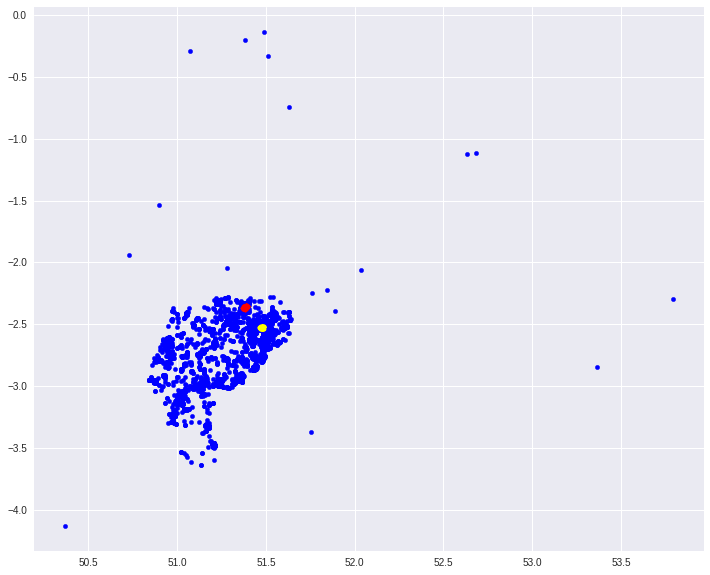

In [0]:


fig, ax = plt.subplots(figsize=(12,10))
ax.scatter(noise['Latitude'], noise['Longitude'],s=20, c='blue' )
ax.scatter(core['Latitude'], core['Longitude'], s=10, c='red')
ax.scatter(core['Latitude'], core['Longitude'], s=10, c='red')
ax.scatter(p1['Latitude'], p1['Longitude'], s=10, c='yellow')
plt.show()

In [0]:
## Better 

In [0]:
_, labels  = dbscan(crime_somerset_gdf[['Latitude', 'Longitude']], eps=0.01, min_samples=300)
labels_df = pd.DataFrame(labels, index=crime_somerset_gdf.index, columns=['cluster'])
labels_df.groupby('cluster').size()

cluster
-1    8847
 0     419
 1    1756
 2     380
 3     381
dtype: int64

In [0]:
noise = crime_somerset_gdf.loc[labels_df['cluster']==-1, ['Latitude', 'Longitude']]
core = crime_somerset_gdf.loc[labels_df['cluster']== 0, ['Latitude', 'Longitude']]
bp1 = crime_somerset_gdf.loc[labels_df['cluster']== 1, ['Latitude', 'Longitude']]
bp2 = crime_somerset_gdf.loc[labels_df['cluster']== 2, ['Latitude', 'Longitude']]
bp3 = crime_somerset_gdf.loc[labels_df['cluster']== 3, ['Latitude', 'Longitude']]


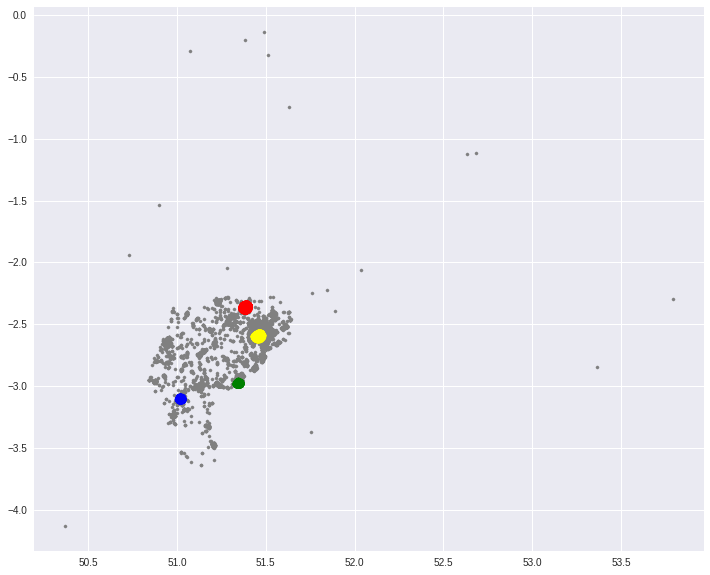

In [0]:
fig, ax = plt.subplots(figsize=(12,10))
ax.scatter(noise['Latitude'], noise['Longitude'],s=10, c='gray' )
ax.scatter(core['Latitude'], core['Longitude'], s=100, c='red')
ax.scatter(bp1['Latitude'], bp1['Longitude'], s=50, c='yellow')
ax.scatter(bp2['Latitude'], bp2['Longitude'], s=50, c='green')
ax.scatter(bp3['Latitude'], bp3['Longitude'], s=50, c='blue')
plt.savefig('cluster_ex1.png');
plt.show()


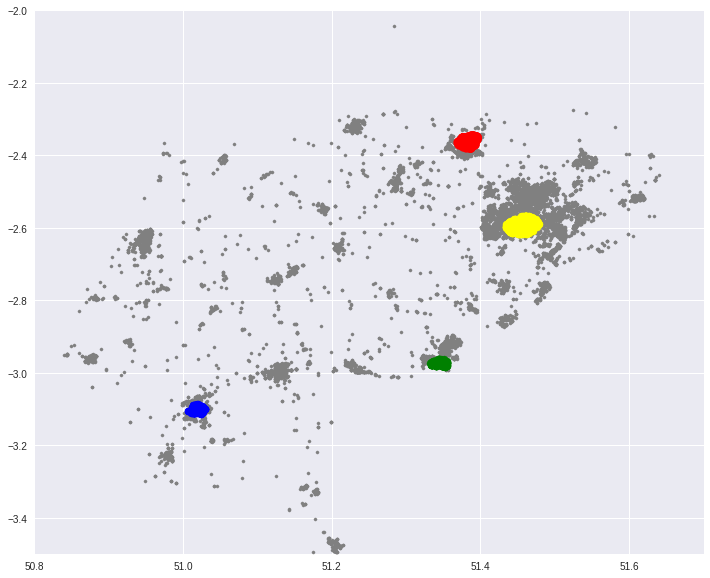

In [0]:
fig, ax = plt.subplots(figsize=(12,10))
ax.scatter(noise['Latitude'], noise['Longitude'],s=10, c='gray' )
ax.scatter(core['Latitude'], core['Longitude'], s=100, c='red')
ax.scatter(bp1['Latitude'], bp1['Longitude'], s=50, c='yellow')
ax.scatter(bp2['Latitude'], bp2['Longitude'], s=50, c='green')
ax.scatter(bp3['Latitude'], bp3['Longitude'], s=50, c='blue')
ax.set_xlim(left=50.8, right=51.7)
ax.set_ylim(bottom=-3.5, top=-2.0)
plt.savefig('cluster_zoomed.png');
plt.show()


## Spatial Autocorellation

https://hub.mybinder.org/user/darribas-notebooks-5g0hn052/notebooks/docs/content/explore/esda/Spatial_Autocorrelation_for_Areal_Unit_Data.ipynb

Bring Sommerset boundaries office --> merge with the points in Polygon --> You lose the outlier points actually they were in londo right b Liecester 



In [0]:
!wget https://www.dropbox.com/s/k2ynddy79k2r46i/ASC_Beats_2016.zip

--2019-04-12 10:10:18--  https://www.dropbox.com/s/k2ynddy79k2r46i/ASC_Beats_2016.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/k2ynddy79k2r46i/ASC_Beats_2016.zip [following]
--2019-04-12 10:10:19--  https://www.dropbox.com/s/raw/k2ynddy79k2r46i/ASC_Beats_2016.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb1005bd2052241896037eacb9f.dl.dropboxusercontent.com/cd/0/inline/Ae1WuDiN_gaxck5dw5XP6rc5Q0PGetT3lHq3-QAO4E6hsXfvyKt5yZtwWAu1_oMoFf8rKpfx1TiKmxU048FxTTrS0ryxQAHTRAAyKs1QsErQKQ/file# [following]
--2019-04-12 10:10:19--  https://ucb1005bd2052241896037eacb9f.dl.dropboxusercontent.com/cd/0/inline/Ae1WuDiN_gaxck5dw5XP6rc5Q0PGetT3lHq3-QAO4E6hsXfvyKt5yZtwWAu1_oMoFf8rKpfx1TiKmxU048FxTTrS0ryxQAHTRAAyKs1QsErQKQ/file
R

In [0]:
!unzip ASC_Beats_2016.zip

Archive:  ASC_Beats_2016.zip
  inflating: ASC_Beats_2016.prj      
  inflating: ASC_Beats_2016.shp      
  inflating: ASC_Beats_2016.shx      
  inflating: ASC_Beats_2016.dbf      


In [0]:
boundaries = gpd.read_file('ASC_Beats_2016.shp')
boundaries.head()

,BEAT_CODE,BEAT_NAME,NPA,LPA,PA,geometry
0,AE037,Yeovil Centre (One Team),Yeovil,AE - Somerset East,A - Somerset,POLYGON Z ((356055.9006000003 117502.300599999...
1,AE036,Yeovil,Yeovil,AE - Somerset East,A - Somerset,POLYGON Z ((356464.4008999998 118237.800899999...
2,AN010,Weston Villages,Worle,AN - Somerset North,A - Somerset,POLYGON Z ((339021.2017999999 162785.102499999...
3,AW039,Sedgemoor North East,Sedgemoor,AW - Somerset West,A - Somerset,POLYGON Z ((339656.8960999995 156204.096300000...
4,AE022,Wells Rural,Mendip West,AE - Somerset East,A - Somerset,"POLYGON Z ((355607.2001999998 154700.5998 0, 3..."


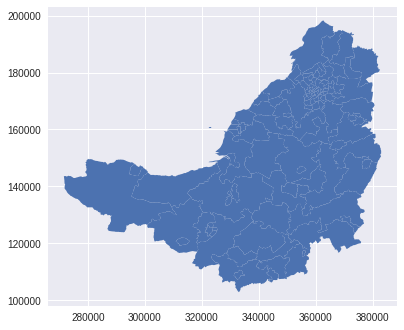

In [0]:
boundaries.plot()

In [0]:
def points_in_polygon(points, polygon):
    "With two GeodataFrame one points and another Polygon --> return the count of Points in each polygon"
    if points.crs != polygon.crs:
        polygon_proj = polygon.to_crs({'init': 'epsg:4326'})
        joined = gpd.sjoin(polygon_proj,points, op='contains' )
    else:
        joined = gpd.sjoin(polygon,points, op='contains' )
    return joined


In [0]:
#joined = points_in_polygon(boundaries, crime_somerset_gdf)

In [0]:
def create_clean_gdf(ptsInPolygon, feature):
    "Groupby and return a clean GeoDataFrame"
    df = crimes_with_boundaries.groupby('BEAT_CODE').size().to_frame().reset_index()
    return df

In [0]:
boundaries.crs, crime_somerset_gdf.crs


({'init': 'epsg:27700'}, {'init': 'epsg:4326'})

In [0]:
boundaries_4326 = boundaries.to_crs({'init': 'epsg:4326'}) # Takes long time to convert to 'epsg:27700'. Did with qgis if needed. changed to 4326 since we do not need it later. 

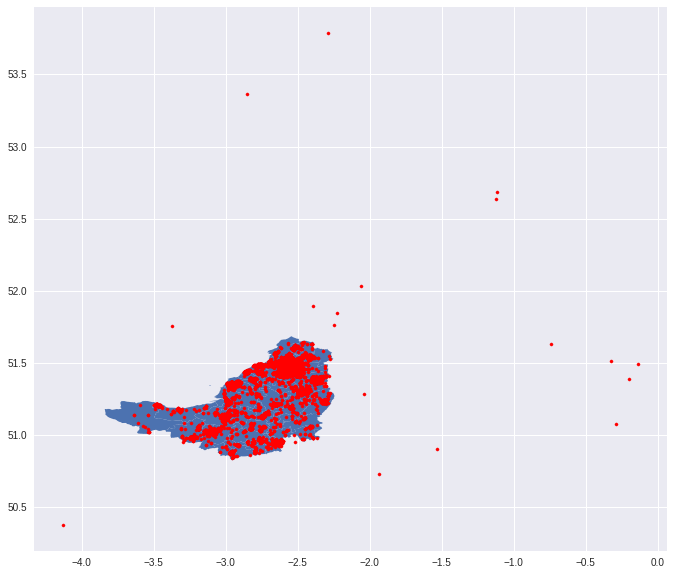

In [0]:
fig, ax = plt.subplots(figsize=(12,10))

boundaries_4326.plot(ax=ax)
crime_somerset_gdf.plot(ax=ax, markersize=10, color='red')
plt.savefig('overlayed_map.png')

In [0]:
# Points in Polygon

crimes_with_boundaries = gpd.sjoin(boundaries_4326,crime_somerset_gdf, op='contains' )

In [0]:
crimes_with_boundaries.head()

,BEAT_CODE,BEAT_NAME,NPA,LPA,PA,geometry,index_right,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type
0,AE037,Yeovil Centre (One Team),Yeovil,AE - Somerset East,A - Somerset,POLYGON Z ((-2.627010923440824 50.955264354592...,10230,2019-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.62479,50.954338,On or near Allingham Road,E01029235,South Somerset 014C,Anti-social behaviour
0,AE037,Yeovil Centre (One Team),Yeovil,AE - Somerset East,A - Somerset,POLYGON Z ((-2.627010923440824 50.955264354592...,10241,2019-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.62479,50.954338,On or near Allingham Road,E01029235,South Somerset 014C,Violence and sexual offences
0,AE037,Yeovil Centre (One Team),Yeovil,AE - Somerset East,A - Somerset,POLYGON Z ((-2.627010923440824 50.955264354592...,10240,2019-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.62479,50.954338,On or near Allingham Road,E01029235,South Somerset 014C,Violence and sexual offences
0,AE037,Yeovil Centre (One Team),Yeovil,AE - Somerset East,A - Somerset,POLYGON Z ((-2.627010923440824 50.955264354592...,10239,2019-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.62479,50.954338,On or near Allingham Road,E01029235,South Somerset 014C,Violence and sexual offences
0,AE037,Yeovil Centre (One Team),Yeovil,AE - Somerset East,A - Somerset,POLYGON Z ((-2.627010923440824 50.955264354592...,10232,2019-02,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.62479,50.954338,On or near Allingham Road,E01029235,South Somerset 014C,Criminal damage and arson


In [0]:
crimes_with_boundaries.shape

(11759, 16)

In [0]:
grouped_crimes = crimes_with_boundaries.groupby('BEAT_CODE').size()
grouped_crimes.head()

BEAT_CODE
AE016    169
AE017     30
AE018     15
AE019    112
AE020     33
dtype: int64

In [0]:
type(grouped_crimes)

pandas.core.series.Series

In [0]:
df = grouped_crimes.to_frame().reset_index()
df.columns = ['BEAT_CODE', 'CrimeCount']

In [0]:
df.head()

,BEAT_CODE,CrimeCount
0,AE016,169
1,AE017,30
2,AE018,15
3,AE019,112
4,AE020,33


In [0]:
final_result = boundaries.merge(df, on='BEAT_CODE')

In [0]:
final_result.head()

,BEAT_CODE,BEAT_NAME,NPA,LPA,PA,geometry,CrimeCount
0,AE037,Yeovil Centre (One Team),Yeovil,AE - Somerset East,A - Somerset,POLYGON Z ((356055.9006000003 117502.300599999...,170
1,AE036,Yeovil,Yeovil,AE - Somerset East,A - Somerset,POLYGON Z ((356464.4008999998 118237.800899999...,251
2,AN010,Weston Villages,Worle,AN - Somerset North,A - Somerset,POLYGON Z ((339021.2017999999 162785.102499999...,38
3,AW039,Sedgemoor North East,Sedgemoor,AW - Somerset West,A - Somerset,POLYGON Z ((339656.8960999995 156204.096300000...,50
4,AE022,Wells Rural,Mendip West,AE - Somerset East,A - Somerset,"POLYGON Z ((355607.2001999998 154700.5998 0, 3...",25


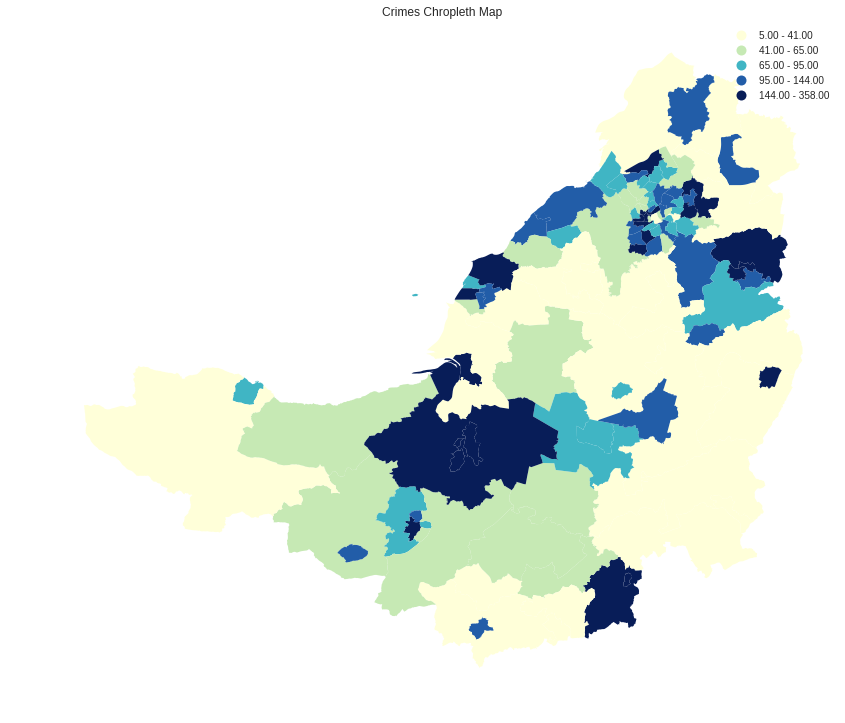

In [0]:
fig, ax = plt.subplots(figsize=(12,10))
final_result.plot(column='CrimeCount', scheme='Quantiles', k=5, cmap='YlGnBu', legend=True, ax=ax);
plt.tight_layout()
ax.set_axis_off()
plt.savefig('choroplethmap.png')
plt.title('Crimes Chropleth Map ')
plt.show()

### GLobal Spatial Autocorrelation

In [0]:
from libpysal.weights.contiguity import Queen

In [0]:
wq =  weights.Queen.from_dataframe(final_result)
wq.transform = 'r'

In [0]:
y = final_result['CrimeCount']
ylag = weights.lag_spatial(wq, y)
final_result['ylag'] = ylag

In [0]:
# SPlot way
y = final_result['CrimeCount'].values
w = Queen.from_dataframe(final_result)
w.transform = 'r'

In [0]:
from esda.moran import Moran

w = Queen.from_dataframe(final_result)
moran = Moran(y, w)
moran.I

0.25553559979168844

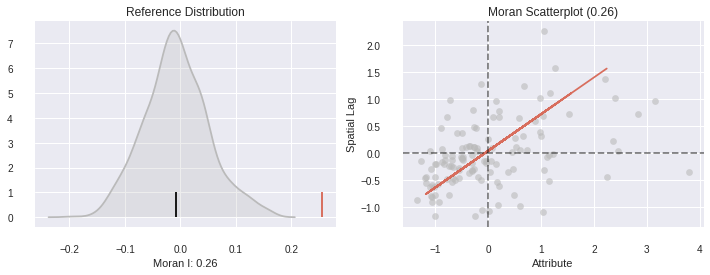

In [0]:
from splot.esda import plot_moran

plot_moran(moran, zstandard=True, figsize=(10,4))
plt.tight_layout()
plt.savefig('moronPlot.png')
plt.show()


In [0]:
moran.p_sim

0.001

## Think of including this into Global Spatial Autocorrleation section

In [0]:
y.median()

In [0]:
yb = y > y.median()
sum(yb)

We have 59 neighborhoods with list prices above the median and 79 below the median (recall the issue with ties).

In [0]:
yb = y > y.median()
labels = ["0 Low", "1 High"]
yb = [labels[i] for i in 1*yb] 
final_result['yb'] = yb

In [0]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
final_result.plot(column='yb', cmap='binary', edgecolor='grey', legend=True, ax=ax)

Assessing Global Spatial Autocorrelation
We calculate Moran's I. A test for global autocorrelation for a continuous attribute

https://github.com/pysal/splot/blob/master/notebooks/esda_morans_viz.ipynb

## Visualizing Local Autocorrelation with splot - Hot Spots, Cold Spots and Spatial Outliers

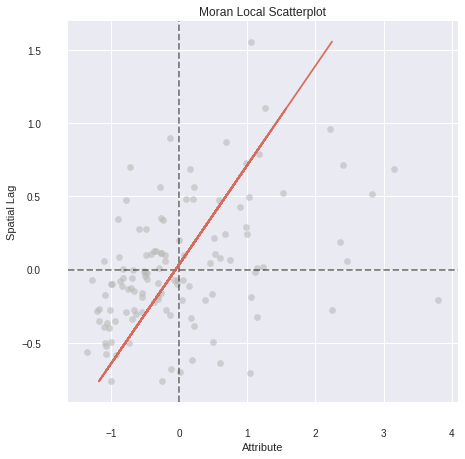

In [0]:
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local

# calculate Moran_Local and plot
moran_loc = Moran_Local(y, w)
fig, ax = moran_scatterplot(moran_loc)
plt.savefig('moron_local.png')
plt.show()

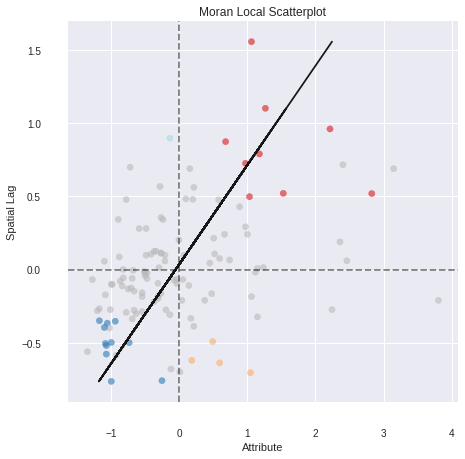

In [0]:
fig, ax = moran_scatterplot(moran_loc, p=0.05)
#ax.set_xlabel('Donatns')
#ax.set_ylabel('Spatial Lag of Donatns')
plt.show()

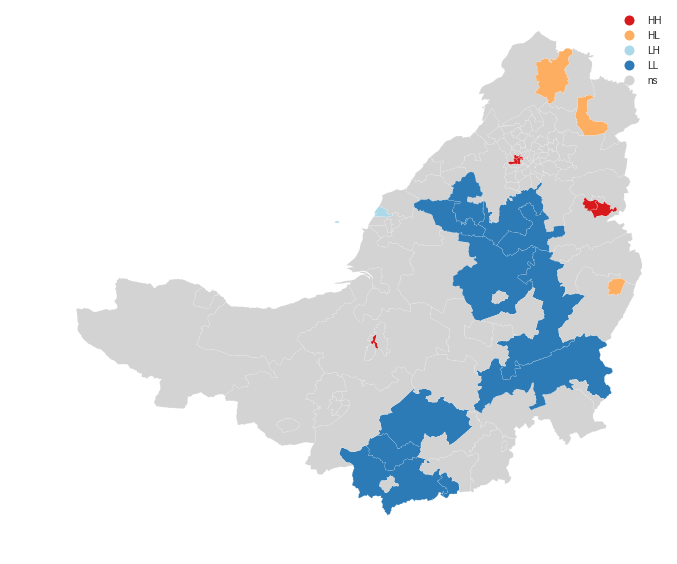

In [0]:

from splot.esda import lisa_cluster
lisa_cluster(moran_loc, final_result, p=0.05, figsize = (10,8))
plt.tight_layout()
plt.savefig('lisa_clusters.png')
plt.show()